In [2]:
# import images
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#scaling
training_images =  training_images / 255.
test_images = test_images /255.

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# First use a Dense NN
model =  tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.5003 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3744 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3361 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3152 - acc: 0.8848
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3431 - acc: 0.8780


In [7]:
# CNN
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(training_images, training_labels,
         epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.4378 - acc: 0.8411
Epoch 2/5
60000/60000 [==============================] - 16s 260us/sample - loss: 0.2948 - acc: 0.8917
Epoch 3/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.2468 - acc: 0.9086
Epoch 4/5
60000/60000 [==============================] - 16s 261us/sample - loss: 0.2144 - acc: 0.9200
Epoch 5/5
10000/10000 [==============================] - 1s 113us/sample - loss: 0.2569 - acc: 0.9082


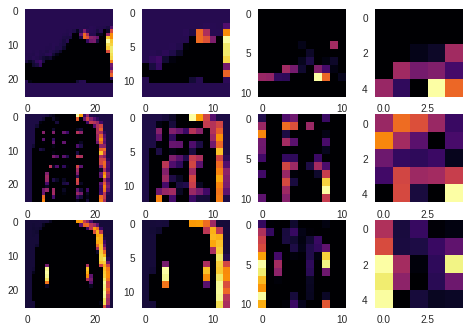

In [12]:
# Visualizing the Convolutions and Pooling on  images

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0 # shoe
SECOND_IMAGE = 7 #shirt
THIRD_IMAGE = 26

CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_ouputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_ouputs)
for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)


####EXERCISES

In [25]:
# Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(training_images, training_labels,
         epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nAcc: ', test_acc)

Epoch 1/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4679 - acc: 0.8326
Epoch 2/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3213 - acc: 0.8825
Epoch 3/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2768 - acc: 0.8977
Epoch 4/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2454 - acc: 0.9085
Epoch 5/5
10000/10000 [==============================] - 1s 90us/sample - loss: 0.2662 - acc: 0.9054

Acc:  0.9054


In [28]:
# Remove the final Convolution. What impact will this have on accuracy or training time?
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(training_images, training_labels,
         epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nAcc: ', test_acc)

Epoch 1/5
60000/60000 [==============================] - 13s 222us/sample - loss: 0.3830 - acc: 0.8637
Epoch 2/5
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2570 - acc: 0.9076
Epoch 3/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2142 - acc: 0.9227
Epoch 4/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1828 - acc: 0.9323
Epoch 5/5
10000/10000 [==============================] - 1s 93us/sample - loss: 0.2537 - acc: 0.9122

Acc:  0.9122


In [30]:
# How about adding more Convolutions? What impact do you think this will have? Experiment with it.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(training_images, training_labels,
         epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nAcc: ', test_acc)

Epoch 1/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.6325 - acc: 0.7644
Epoch 2/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.4290 - acc: 0.8424
Epoch 3/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3779 - acc: 0.8603
Epoch 4/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.3422 - acc: 0.8743
Epoch 5/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.3185 - acc: 0.8811
Epoch 6/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.2963 - acc: 0.8912
Epoch 7/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2827 - acc: 0.8950
Epoch 8/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2703 - acc: 0.8995
Epoch 9/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2583 - acc: 0.9037
Epoch 10/10
10000/10000 [==============================] - 1s 11

In [33]:
# In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

class MyCallback(tf.keras.callbacks.Callback):
  
  def on_epoch_end(self, epochs, logs={}):
    if logs['loss'] < 0.24:
      print("\nloss less than 0.24. Stopping the training")
      self.model.stop_training = True
      
callback = MyCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(training_images, training_labels,
         epochs=5,
         callbacks=[callback])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nAcc: ', test_acc)


Epoch 1/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.4602 - acc: 0.8339
Epoch 2/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.3168 - acc: 0.8848
Epoch 3/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2761 - acc: 0.8981
Epoch 4/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2463 - acc: 0.9095
Epoch 5/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.2212 - acc: 0.9168
loss less than 0.24. Stopping the training
10000/10000 [==============================] - 1s 111us/sample - loss: 0.2837 - acc: 0.8938

Acc:  0.8938
